## Baseline score -  randomly guessing given that we know that 20% of the data is popular

In [58]:
import random
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_colwidth",999)
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)
np.set_printoptions(suppress=True)

In [244]:
def randomly_guessing(n_simulations = 10):
    
    count = 0 #
    #keep track of 
    accuracy_baseline = np.zeros(shape=(1,9*n_simulations)) #we have 9 test sets for 2017. Multiply by 9 for each simulation.  
    recall_baseline = np.zeros(shape=(1,9*n_simulations))
    precision_baseline = np.zeros(shape=(1,9*n_simulations))
    f1_baseline = np.zeros(shape=(1,9*n_simulations))
    
    for i in range(n_simulations):
        my_list = [True for x in range(2)] +  [False for x in range(8)]
        start_month = 1
        end_month = 4
        while end_month <13:
            y_test = df_sf_2017[df_sf_2017['month'] == end_month]['popular']
            y_pred = pd.Series(random.choice(my_list) for x in range(y_test.size))
            accuracy_baseline[0][count] = accuracy_score(y_test, y_pred)
            recall_baseline[0][count] = recall_score(y_test, y_pred)
            precision_baseline[0][count] = precision_score(y_test, y_pred)
            f1_baseline[0][count] = f1_score(y_test, y_pred)
            count+=1
            start_month += 1
            end_month += 1
            
    return accuracy_baseline, recall_baseline, precision_baseline, f1_baseline


In [235]:
accuracy_baseline, recall_baseline, precision_baseline, f1_baseline = randomly_guessing(n_simulations = 1000)
print(accuracy_baseline.mean())
print(recall_baseline.mean()) 
print(precision_baseline.mean()) 
print(f1_baseline.mean())

0.6738568003192421
0.19992382244534446
0.2098987145097955
0.20396154681655437


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [86]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Load data

In [9]:
# df_sf_2017 = pickle.load(open('../data_sf_2017.p', 'rb'))

In [59]:
df_sf_2017 = pd.read_json('df_sf_2017')

In [11]:
len(df_sf_2017)

117262

# NLP

In [60]:
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import time
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, make_scorer, precision_score, f1_score

In [61]:
df_sf_2017.description.fillna(value='None', inplace=True)

In [62]:
df_sf_2017["description_new"] = df_sf_2017['description'].str.replace('[^\w\s]','')

## Test

In [181]:
test1 = df_sf_2017['description'].iloc[0:2]

In [200]:
# import string 
# def remove_punctuations(text):
#     return text.translate(None,string.punctuation)


In [177]:
# punc = RegexpTokenizer(r'\w+')

In [225]:
# token_pattern = r'\w+'

In [213]:
testing = df_sf_2017['description_new'].iloc[1:3]
tf_vectorizer_train = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', token_pattern = r'\w+').fit(testing)

In [215]:
tf_vectorizer_train.vocabulary_

{'floor': 30,
 'breath': 15,
 'taking': 86,
 'view': 96,
 'easy': 25,
 'transportation': 91,
 'downtown': 24,
 'great': 35,
 'neighborhood': 55,
 'san': 76,
 'francisco': 31,
 'safe': 75,
 'free': 32,
 'parking': 59,
 'located': 46,
 'geographically': 34,
 'center': 17,
 'city': 18,
 'public': 68,
 'available': 10,
 '15': 1,
 'minute': 51,
 'private': 67,
 'bathroom': 11,
 'room': 74,
 'street': 83,
 'lovely': 48,
 'noe': 57,
 'valley': 94,
 'access': 5,
 'muni': 54,
 'market': 49,
 'perfectly': 63,
 'enjoy': 26,
 'peaceful': 61,
 'environment': 28,
 'want': 97,
 'close': 20,
 'shopping': 81,
 'restaurant': 72,
 'nightlife': 56,
 'block': 14,
 'j': 41,
 'train': 90,
 '20m': 3,
 'ride': 73,
 '3': 4,
 'mission': 52,
 'apartment': 8,
 '2': 2,
 'bedroom': 12,
 '1': 0,
 'recently': 70,
 'remodeled': 71,
 'modern': 53,
 'kitchen': 42,
 'dishwasher': 23,
 'washerdryer': 98,
 'building': 16,
 'use': 93,
 'best': 13,
 'hill': 38,
 'climb': 19,
 'sunny': 85,
 'airy': 6,
 'minimalist': 50,
 'terr

In [160]:
text = 'walk you i san are to .be hippo geese. geese goose francisco walked'

stop_words = stopwords.words("english")
stop_words.append('san')
stop_words.append('francisco')
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
stemmed = []
snowball = SnowballStemmer("english")
for item in tokens:
    if item not in stop_words:
        stemmed.append(snowball.stem(item))
print(stemmed)

['walk', 'hippo', 'gees', 'gees', 'goos', 'walk']


In [138]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [161]:
%%time

# def process_text(text):
#     stop_words = stopwords.words("english")
#     stop_words.append('san')
#     stop_words.append('francisco')
#     tokenizer = RegexpTokenizer(r'\w+')
#     tokens = tokenizer.tokenize(text)
    
#     stemmed = []
#     snowball = SnowballStemmer("english")
#     for item in tokens:
#         if item not in stop_words:
#             stemmed.append(snowball.stem(item))
        
#     lemmatized = []
#     wordnet = WordNetLemmatizer()
#     for item in stemmed:
#         lemmatized.append(wordnet.lemmatize(item))
    
#     return lemmatized
    

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs


## LemmaTokenizer

In [63]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

## split data - running NLP on description column

In [64]:
def split_data(start_month, end_month):
    df_X_train = df_sf_2017[(df_sf_2017['month'] >= start_month) & (df_sf_2017['month'] < end_month)]['description_new']
    y_train = df_sf_2017[(df_sf_2017['month'] >= start_month) & (df_sf_2017['month'] < end_month)]['popular']

    df_X_test = df_sf_2017[df_sf_2017['month'] == end_month]['description_new']
    y_test = df_sf_2017[df_sf_2017['month'] == end_month]['popular']
    
    return df_X_train, y_train, df_X_test, y_test

## Run CountVectorizer

In [65]:
%%time
def run_tf_vec(df_X_train, df_X_test):
    tf_vectorizer_train = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english').fit(df_X_train)
    X_train = tf_vectorizer_train.transform(df_X_train)
    tf_vectorizer_test = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', vocabulary = tf_vectorizer_train.vocabulary_).fit(df_X_test)
    X_test = tf_vectorizer_test.transform(df_X_test)
    return X_train, X_test, tf_vectorizer_train

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.3 µs


In [53]:
X_train

<26498x20903 sparse matrix of type '<class 'numpy.int64'>'
	with 1649921 stored elements in Compressed Sparse Row format>

In [66]:
def predict_tf_nb(X_train, y_train, X_test, y_test):
    from sklearn.naive_bayes import MultinomialNB
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    pickle.dump(nb, open('tf_nb_descrip'+ str(model_num) + '.p', 'wb'))
    preds = nb.predict(X_test)
    scores_tf_nb[0][model_num] = accuracy_score(y_test, preds)
    scores_tf_nb[1][model_num] = recall_score(y_test, nb.predict(X_test))
    scores_tf_nb[2][model_num] = precision_score(y_test, nb.predict(X_test))
    scores_tf_nb[3][model_num] = f1_score(y_test, nb.predict(X_test))
    return scores_tf_nb

In [67]:
def grid_searching (param_grid, model):

    grid_search = GridSearchCV(model, 
                               param_grid=param_grid, cv=5, 
                               n_jobs=-1, scoring=make_scorer(f1_score))
    fit = grid_search.fit(X_train, y_train)
    predicted = fit.predict(X_test)
    return grid_search.best_params_


## With the CountVectorizer, run with RandomForest 

In [79]:
def predict_tf_rf(X_train, y_train, X_test, y_test):
    param_grid = {'n_estimators': [500, 1000, 1500], 
                  'max_features': ['auto'], 
                  'max_depth': [None, 10, 5],
                  'class_weight': [None, {0: .8, 1: .2}, {0: .9, 1: .1}, {0: .99, 1: .01}]}

    model = RandomForestClassifier()
    
    best_parameters = grid_searching(param_grid, model)
    print(best_parameters)
    rf = RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                n_jobs = -1, 
                                random_state = 0, 
                                max_depth = best_parameters['max_depth'], 
                                class_weight = best_parameters['class_weight'])
    rf.fit(X_train, y_train)
    predicted = rf.predict(X_test)
    pickle.dump(rf, open('tf_rf_descrip' + str(model_num) + '.p', 'wb'))
    scores_tf_rf[0][model_num] = accuracy_score(y_test, predicted)
    scores_tf_rf[1][model_num] = recall_score(y_test, predicted)
    scores_tf_rf[2][model_num] = precision_score(y_test, predicted)
    scores_tf_rf[3][model_num] = f1_score(y_test, predicted)
    return scores_tf_rf

In [69]:
scores_tf_nb = np.zeros(shape=(4,9))
scores_tf_rf = np.zeros(shape=(4,9))

model_num = 0
start_month = 1
end_month = 4

In [70]:
%%time
while end_month <13:
    df_X_train, y_train, df_X_test, y_test = split_data(start_month, end_month)
    X_train, X_test, tf_vectorizer_train = run_tf_vec(df_X_train, df_X_test)
    scores_tf_nb = predict_tf_nb(X_train, y_train, X_test, y_test)
    scores_tf_rf = predict_tf_rf(X_train, y_train, X_test, y_test)
    print(start_month, end_month, model_num)
    model_num += 1
    start_month += 1
    end_month += 1
    print('tf_nb')
    print(scores_tf_nb)
    print('tf_rf')
    print(scores_tf_rf)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/m

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/m

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/m

{'class_weight': None, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 500}


JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7fefb7e1e540, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ubuntu/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ubuntu.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7fefb7e1e540, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/home/ubuntu/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/home/ubuntu.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1426                         logger.warning('Executing %s took %.3f seconds',
   1427                                        _format_handle(handle), dt)
   1428                 finally:
   1429                     self._current_handle = None
   1430             else:
-> 1431                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(15, 1)>>
   1432         handle = None  # Needed to break cycles when an exception occurs.
   1433 
   1434     def _set_coroutine_wrapper(self, enabled):
   1435         try:

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(15, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (15, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=15, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 8, 6, 54, 28, 168713, tzinfo=tzlocal()), 'msg_id': 'e2149910a62e44e4ab408a5ff34386e8', 'msg_type': 'execute_request', 'session': '02847244f2744cca89708ad74b5023ef', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e2149910a62e44e4ab408a5ff34386e8', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'02847244f2744cca89708ad74b5023ef']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 8, 6, 54, 28, 168713, tzinfo=tzlocal()), 'msg_id': 'e2149910a62e44e4ab408a5ff34386e8', 'msg_type': 'execute_request', 'session': '02847244f2744cca89708ad74b5023ef', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e2149910a62e44e4ab408a5ff34386e8', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'02847244f2744cca89708ad74b5023ef'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 8, 8, 6, 54, 28, 168713, tzinfo=tzlocal()), 'msg_id': 'e2149910a62e44e4ab408a5ff34386e8', 'msg_type': 'execute_request', 'session': '02847244f2744cca89708ad74b5023ef', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e2149910a62e44e4ab408a5ff34386e8', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = "%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)"
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="%%time\nwhile end_month <13:\n    df_X_train, y_tr...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-70-274214cc1635>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7fee7fd1d5c0, executi...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fee25b91030, file "<ipython-input-70-274214cc1635>", line 1>
        result = <ExecutionResult object at 7fee7fd1d5c0, executi...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fee25b91030, file "<ipython-input-70-274214cc1635>", line 1>, result=<ExecutionResult object at 7fee7fd1d5c0, executi...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fee25b91030, file "<ipython-input-70-274214cc1635>", line 1>
        self.user_global_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'Counter': <class 'collections.Counter'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import random\nimport pandas as pd\nimport numpy a..._columns",999)\nnp.set_printoptions(suppress=True)', "df_sf_2017 = pd.read_json('df_sf_2017')", 'import nltk\nfrom nltk.tokenize import RegexpToke...n_matrix, recall_score, precision_score, f1_score', "df_sf_2017.description.fillna(value='None', inplace=True)", 'df_sf_2017["description_new"] = df_sf_2017[\'description\'].str.replace(\'[^\\w\\s]\',\'\')', 'from nltk import word_tokenize          \nfrom nl...nl.lemmatize(t) for t in word_tokenize(articles)]', 'def split_data(start_month, end_month):\n    df_X...    return df_X_train, y_train, df_X_test, y_test', 'get_ipython().run_cell_magic(\'time\', \'\', "def ru...    return X_train, X_test, tf_vectorizer_train")', 'def predict_tf_nb(X_train, y_train, X_test, y_te...test, nb.predict(X_test))\n    return scores_tf_nb', 'def grid_searching (param_grid, model):\n\n    gri...edict(X_test)\n    return grid_search.best_params_', 'def predict_tf_rf(X_train, y_train, X_test, y_te..._score(y_test, predicted)\n    return scores_tf_rf', 'scores_tf_nb = np.zeros(shape=(4,9))\nscores_tf_r...,9))\n\nmodel_num = 0\nstart_month = 1\nend_month = 4', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'import nltk\nfrom nltk.tokenize import RegexpToke...all_score, make_scorer, precision_score, f1_score', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'import random\nimport pandas as pd\nimport numpy a..._columns",999)\nnp.set_printoptions(suppress=True)', "a = pickle.load(open('rf_nlp_countvec_500.p', 'r...a.fit(X_train, y_train)\npreds = a.predict(X_test)", ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LemmaTokenizer': <class '__main__.LemmaTokenizer'>, 'Out': {27: array([[0.61468523, 0.        , 0.        , 0.  ...0.        , 0.        , 0.        , 0.        ]]), 32: <26498x20903 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>, 43: 0.3126540673788003, 53: <26498x20903 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RegexpTokenizer': <class 'nltk.tokenize.regexp.RegexpTokenizer'>, 'SnowballStemmer': <class 'nltk.stem.snowball.SnowballStemmer'>, ...}
        self.user_ns = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'Counter': <class 'collections.Counter'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import random\nimport pandas as pd\nimport numpy a..._columns",999)\nnp.set_printoptions(suppress=True)', "df_sf_2017 = pd.read_json('df_sf_2017')", 'import nltk\nfrom nltk.tokenize import RegexpToke...n_matrix, recall_score, precision_score, f1_score', "df_sf_2017.description.fillna(value='None', inplace=True)", 'df_sf_2017["description_new"] = df_sf_2017[\'description\'].str.replace(\'[^\\w\\s]\',\'\')', 'from nltk import word_tokenize          \nfrom nl...nl.lemmatize(t) for t in word_tokenize(articles)]', 'def split_data(start_month, end_month):\n    df_X...    return df_X_train, y_train, df_X_test, y_test', 'get_ipython().run_cell_magic(\'time\', \'\', "def ru...    return X_train, X_test, tf_vectorizer_train")', 'def predict_tf_nb(X_train, y_train, X_test, y_te...test, nb.predict(X_test))\n    return scores_tf_nb', 'def grid_searching (param_grid, model):\n\n    gri...edict(X_test)\n    return grid_search.best_params_', 'def predict_tf_rf(X_train, y_train, X_test, y_te..._score(y_test, predicted)\n    return scores_tf_rf', 'scores_tf_nb = np.zeros(shape=(4,9))\nscores_tf_r...,9))\n\nmodel_num = 0\nstart_month = 1\nend_month = 4', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'import nltk\nfrom nltk.tokenize import RegexpToke...all_score, make_scorer, precision_score, f1_score', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'import random\nimport pandas as pd\nimport numpy a..._columns",999)\nnp.set_printoptions(suppress=True)', "a = pickle.load(open('rf_nlp_countvec_500.p', 'r...a.fit(X_train, y_train)\npreds = a.predict(X_test)", ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LemmaTokenizer': <class '__main__.LemmaTokenizer'>, 'Out': {27: array([[0.61468523, 0.        , 0.        , 0.  ...0.        , 0.        , 0.        , 0.        ]]), 32: <26498x20903 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>, 43: 0.3126540673788003, 53: <26498x20903 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RegexpTokenizer': <class 'nltk.tokenize.regexp.RegexpTokenizer'>, 'SnowballStemmer': <class 'nltk.stem.snowball.SnowballStemmer'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/home/ubuntu/capstone_airbnb/<ipython-input-70-274214cc1635> in <module>()
----> 1 get_ipython().run_cell_magic('time', '', "while end_month <13:\n    df_X_train, y_train, df_X_test, y_test = split_data(start_month, end_month)\n    X_train, X_test, tf_vectorizer_train = run_tf_vec(df_X_train, df_X_test)\n    scores_tf_nb = predict_tf_nb(X_train, y_train, X_test, y_test)\n    scores_tf_rf = predict_tf_rf(X_train, y_train, X_test, y_test)\n    print(start_month, end_month, model_num)\n    model_num += 1\n    start_month += 1\n    end_month += 1\n    print('tf_nb')\n    print(scores_tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)")

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name='time', line='', cell="while end_month <13:\n    df_X_train, y_train, df...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)")
   2162             # This will need to be updated if the internal calling logic gets
   2163             # refactored, or else we'll be expanding the wrong variables.
   2164             stack_depth = 2
   2165             magic_arg_s = self.var_expand(line, stack_depth)
   2166             with self.builtin_trap:
-> 2167                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = ''
        cell = "while end_month <13:\n    df_X_train, y_train, df...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)"
   2168             return result
   2169 
   2170     def find_line_magic(self, magic_name):
   2171         """Find and return a line magic by name.

...........................................................................
/home/ubuntu/capstone_airbnb/<decorator-gen-62> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell="while end_month <13:\n    df_X_train, y_train, df...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", local_ns=None)

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/magic.py in <lambda>(f=<function ExecutionMagics.time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, '', "while end_month <13:\n    df_X_train, y_train, df...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", None), **k={})
    182     validate_type(magic_kind)
    183 
    184     # This is a closure to capture the magic_kind.  We could also use a class,
    185     # but it's overkill for just that one bit of state.
    186     def magic_deco(arg):
--> 187         call = lambda f, *a, **k: f(*a, **k)
        f = <function ExecutionMagics.time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, '', "while end_month <13:\n    df_X_train, y_train, df...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", None)
        k = {}
    188 
    189         if callable(arg):
    190             # "Naked" decorator call (just @foo, no args)
    191             func = arg

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell="while end_month <13:\n    df_X_train, y_train, df...tf_nb)\n    print('tf_rf')\n    print(scores_tf_rf)", local_ns=None)
   1233                 return
   1234             end = clock2()
   1235         else:
   1236             st = clock2()
   1237             try:
-> 1238                 exec(code, glob, local_ns)
        code = <code object <module> at 0x7fee5727fed0, file "<timed exec>", line 1>
        glob = {'CountVectorizer': <class 'sklearn.feature_extraction.text.CountVectorizer'>, 'Counter': <class 'collections.Counter'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import random\nimport pandas as pd\nimport numpy a..._columns",999)\nnp.set_printoptions(suppress=True)', "df_sf_2017 = pd.read_json('df_sf_2017')", 'import nltk\nfrom nltk.tokenize import RegexpToke...n_matrix, recall_score, precision_score, f1_score', "df_sf_2017.description.fillna(value='None', inplace=True)", 'df_sf_2017["description_new"] = df_sf_2017[\'description\'].str.replace(\'[^\\w\\s]\',\'\')', 'from nltk import word_tokenize          \nfrom nl...nl.lemmatize(t) for t in word_tokenize(articles)]', 'def split_data(start_month, end_month):\n    df_X...    return df_X_train, y_train, df_X_test, y_test', 'get_ipython().run_cell_magic(\'time\', \'\', "def ru...    return X_train, X_test, tf_vectorizer_train")', 'def predict_tf_nb(X_train, y_train, X_test, y_te...test, nb.predict(X_test))\n    return scores_tf_nb', 'def grid_searching (param_grid, model):\n\n    gri...edict(X_test)\n    return grid_search.best_params_', 'def predict_tf_rf(X_train, y_train, X_test, y_te..._score(y_test, predicted)\n    return scores_tf_rf', 'scores_tf_nb = np.zeros(shape=(4,9))\nscores_tf_r...,9))\n\nmodel_num = 0\nstart_month = 1\nend_month = 4', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'import nltk\nfrom nltk.tokenize import RegexpToke...all_score, make_scorer, precision_score, f1_score', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'get_ipython().run_cell_magic(\'time\', \'\', "while ...b)\\n    print(\'tf_rf\')\\n    print(scores_tf_rf)")', 'import random\nimport pandas as pd\nimport numpy a..._columns",999)\nnp.set_printoptions(suppress=True)', "a = pickle.load(open('rf_nlp_countvec_500.p', 'r...a.fit(X_train, y_train)\npreds = a.predict(X_test)", ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'LemmaTokenizer': <class '__main__.LemmaTokenizer'>, 'Out': {27: array([[0.61468523, 0.        , 0.        , 0.  ...0.        , 0.        , 0.        , 0.        ]]), 32: <26498x20903 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>, 43: 0.3126540673788003, 53: <26498x20903 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'RegexpTokenizer': <class 'nltk.tokenize.regexp.RegexpTokenizer'>, 'SnowballStemmer': <class 'nltk.stem.snowball.SnowballStemmer'>, ...}
        local_ns = None
   1239             except:
   1240                 self.shell.showtraceback()
   1241                 return
   1242             end = clock2()

...........................................................................
/home/ubuntu/capstone_airbnb/<timed exec> in <module>()

...........................................................................
/home/ubuntu/capstone_airbnb/<ipython-input-68-1c4d5bd2b54a> in predict_tf_rf(X_train=<26498x20903 sparse matrix of type '<class 'nump... stored elements in Compressed Sparse Row format>, y_train=100000    False
100001    False
100002    False
...   True
Name: popular, Length: 26498, dtype: bool, X_test=<8689x20903 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>, y_test=180404    False
180405    False
180406    False
...   False
Name: popular, Length: 8689, dtype: bool)
     12                                 n_jobs = -1, 
     13                                 random_state = 0, 
     14                                 max_features = ['auto'], 
     15                                 max_depth = best_parameters['max_depth'], 
     16                                 class_weight = best_parameters['class_weight'])
---> 17     rf.fit(X_train, y_train)
     18     predicted = rf.predict(X_test)
     19     pickle.dump(rf, open('tf_rf_descrip' + str(model_num) + '.p', 'wb'))
     20     scores_tf_rf[0][model_num] = accuracy_score(y_test, predicted)
     21     scores_tf_rf[1][model_num] = recall_score(y_test, predicted)

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), X=<26498x20903 sparse matrix of type '<class 'nump...ored elements in Compressed Sparse Column format>, y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 499
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Wed Aug  8 09:49:15 2018
PID: 28062                  Python 3.6.4: /home/ubuntu/anaconda3/bin/python
...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), <26498x20903 sparse matrix of type '<class 'nump...ored elements in Compressed Sparse Column format>, array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), None, 0, 500), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), <26498x20903 sparse matrix of type '<class 'nump...ored elements in Compressed Sparse Column format>, array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), None, 0, 500)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), X=<26498x20903 sparse matrix of type '<class 'nump...ored elements in Compressed Sparse Column format>, y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), sample_weight=None, tree_idx=0, n_trees=500, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...        random_state=209652396, splitter='best')>
        X = <26498x20903 sparse matrix of type '<class 'nump...ored elements in Compressed Sparse Column format>
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])
        sample_weight = None
        curr_sample_weight = array([0., 0., 1., ..., 2., 2., 2.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), X=<26498x20903 sparse matrix of type '<class 'nump...ored elements in Compressed Sparse Column format>, y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), sample_weight=array([0., 0., 1., ..., 2., 2., 2.]), check_input=False, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...         random_state=209652396, splitter='best'), X=<26498x20903 sparse matrix of type '<class 'nump...ored elements in Compressed Sparse Column format>, y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]]), sample_weight=array([0., 0., 1., ..., 2., 2., 2.]), check_input=False, X_idx_sorted=None)
    221         elif self.max_features is None:
    222             max_features = self.n_features_
    223         elif isinstance(self.max_features, (numbers.Integral, np.integer)):
    224             max_features = self.max_features
    225         else:  # float
--> 226             if self.max_features > 0.0:
        self.max_features = ['auto']
    227                 max_features = max(1,
    228                                    int(self.max_features * self.n_features_))
    229             else:
    230                 max_features = 0

TypeError: '>' not supported between instances of 'list' and 'float'
___________________________________________________________________________

## COUNT VECTORIZER NAIVE BAYES

In [15]:
accuracy_2017_tf_nb = np.mean(scores_tf_nb[0])
recall_2017_tf_nb = np.mean(scores_tf_nb[1])
precision_2017_tf_nb = np.mean(scores_tf_nb[2])
f1_score_2017_tf_nb = np.mean(scores_tf_nb[3])
print(accuracy_2017_tf_nb)
print(recall_2017_tf_nb)
print(precision_2017_tf_nb)
print(f1_score_2017_tf_nb)

0.8742970560045102
0.7169107075713074
0.6929862495075171
0.7043799660889926


## COUNT VECTORIZER RANDOM FOREST

In [14]:
accuracy_2017_tf_rf = np.mean(scores_tf_rf[0])
recall_2017_tf_rf = np.mean(scores_tf_rf[1])
precision_2017_tf_rf = np.mean(scores_tf_rf[2])
f1_score_2017_tf_rf = np.mean(scores_tf_rf[3])
print(accuracy_2017_tf_rf)
print(recall_2017_tf_rf)
print(precision_2017_tf_rf)
print(f1_score_2017_tf_rf)

0.9474790730435897
0.790758536328864
0.9494687554573628
0.8623895527424829


## Try running with TF-IDF

In [74]:
def run_tf_idf_vec(df_X_train, df_X_test):
    tf_idf_vectorizer_train = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english')
    X_train2 = tf_idf_vectorizer_train.fit_transform(df_X_train).toarray()
    tf_idf_vectorizer_test = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', vocabulary = tf_idf_vectorizer_train.vocabulary_)
    X_test2 = tf_idf_vectorizer_test.fit_transform(df_X_test).toarray()
    return X_train2, X_test2, tf_idf_vectorizer_train

In [75]:
def predict_tf_idf_nb(X_train2, y_train, X_test2, y_test):
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train2, y_train)
    pickle.dump(nb, open('tf_idf_nb_descrip' + str(model_num) + '.p', 'wb'))
    preds = nb.predict(X_test2)
    scores_tf_idf_nb[0][model_num] = accuracy_score(y_test, preds)
    scores_tf_idf_nb[1][model_num] = recall_score(y_test, preds)
    scores_tf_idf_nb[2][model_num] = precision_score(y_test, preds)
    scores_tf_idf_nb[3][model_num] = f1_score(y_test, preds)
    return scores_tf_idf_nb, nb

## With the TF-IDF, run with RandomForest 

In [76]:
def predict_tf_idf_rf(X_train2, y_train, X_test2, y_test):
    rf = RandomForestClassifier(n_estimators = 10, n_jobs=-1, random_state=0, class_weight = {0:.95, 1:.05})
    rf.fit(X_train2, y_train)
    predicted = rf.predict(X_test2)
    pickle.dump(rf, open('tf_idf_rf_descrip'+ str(model_num) + '.p', 'wb'))
    scores_tf_idf_rf[0][model_num] = accuracy_score(y_test, predicted)
    scores_tf_idf_rf[1][model_num] = recall_score(y_test, predicted)
    scores_tf_idf_rf[2][model_num] = precision_score(y_test, predicted)
    scores_tf_idf_rf[3][model_num] = f1_score(y_test, predicted)
    return scores_tf_idf_rf, rf

In [19]:
a = pickle.load(open('rf_nlp_countvec_500.p', 'rb'))
a.fit(X_train, y_train)
preds = a.predict(X_test)

In [77]:
scores_tf_idf_nb = np.zeros(shape=(4,9))
scores_tf_idf_rf = np.zeros(shape=(4,9))

model_num = 0
start_month = 1
end_month = 4

In [78]:
%%time
while end_month <13:
    df_X_train, y_train, df_X_test, y_test = split_data(start_month, end_month) 
    X_train2, X_test2, tf_idf_vectorizer_train = run_tf_idf_vec(df_X_train, df_X_test)
    scores_tf_idf_nb, nb = predict_tf_idf_nb(X_train2, y_train, X_test2, y_test)
    scores_tf_idf_rf, rf = predict_tf_idf_rf(X_train2, y_train, X_test2, y_test)
    print(start_month, end_month, model_num)
    model_num += 1
    start_month += 1
    end_month += 1
    print('tf_idf_nb')
    print(scores_tf_idf_nb)
    print('tf_idf_rf')
    print(scores_tf_idf_rf)

1 4 0
tf_idf_nb
[[0.73403153 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.93237032 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.39140022 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.55134925 0.         0.         0.         0.         0.
  0.         0.         0.        ]]
tf_idf_rf
[[0.94936126 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.76493762 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.93424218 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.84115523 0.         0.         0.         0.         0.
  0.         0.         0.        ]]
2 5 1
tf_idf_nb
[[0.73403153 0.73084862 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.93237032 0.9194499  0.         0.         0.         0.
  0.         0.         0.      

## TF IDF NAIVE BAYES

In [80]:
accuracy_2017_tf_idf_nb = np.mean(scores_tf_idf_nb[0])
recall_2017_tf_idf_nb = np.mean(scores_tf_idf_nb[1])
precision_2017_tf_idf_nb = np.mean(scores_tf_idf_nb[2])
f1_score_2017_tf_idf_nb = np.mean(scores_tf_idf_nb[3])
print(accuracy_2017_tf_idf_nb)
print(recall_2017_tf_idf_nb)
print(precision_2017_tf_idf_nb)
print(f1_score_2017_tf_idf_nb)

0.7404176382546709
0.9231443684365492
0.4319956286015536
0.5876026924060398


## TF IDF RANDOM FOREST

In [81]:
accuracy_2017_tf_idf_rf = np.mean(scores_tf_idf_rf[0])
recall_2017_tf_idf_rf = np.mean(scores_tf_idf_rf[1])
precision_2017_tf_idf_rf = np.mean(scores_tf_idf_rf[2])
f1_score_2017_tf_idf_rf = np.mean(scores_tf_idf_rf[3])
print(accuracy_2017_tf_idf_rf)
print(recall_2017_tf_idf_rf)
print(precision_2017_tf_idf_rf)
print(f1_score_2017_tf_idf_rf)

0.9402834453899148
0.7532084507262276
0.9364673471514087
0.8344959114674015


## Kmeans

In [83]:
from sklearn.cluster import KMeans

In [38]:
# features =  tf_idf_vectorizer_train.get_feature_names()

In [82]:
model_num = 0
start_month = 1
end_month = 4

scores_tf_kmeans = np.zeros(shape=(4,9))

In [88]:
%%time
def predict_tf_idf_kmeans(X_train2, y_train, X_test2, y_test):
    kmeans = KMeans(n_clusters=2, n_jobs=-1, n_init = 20)
    kmeans.fit(X_train2)
    predicted = kmeans.predict(X_test2)
    pickle.dump(rf, open('tf_idf_descrip_kmeans.p', 'wb'))
    scores_tf_kmeans[0][model_num] = accuracy_score(y_test, predicted)
    scores_tf_kmeans[1][model_num] = recall_score(y_test, predicted)
    scores_tf_kmeans[2][model_num] = precision_score(y_test, predicted)
    scores_tf_kmeans[3][model_num] = f1_score(y_test, predicted)
    return scores_tf_kmeans, kmeans

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.5 µs


In [89]:
%%time
while end_month <13:
    df_X_train, y_train, df_X_test, y_test = split_data(start_month, end_month) 
    X_train2, X_test2, tf_idf_vectorizer_train = run_tf_idf_vec(df_X_train, df_X_test)
    scores_tf_idf_kmeans, kmeans = predict_tf_idf_kmeans(X_train2, y_train, X_test2, y_test)
    print(start_month, end_month, model_num)
    model_num += 1
    start_month += 1
    end_month += 1
    print('tf_idf_kmeans')
    print(scores_tf_idf_kmeans)
    %%time
    # TF-IDF vectorizer
    top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-60:-1]
    print("top words for each cluster:")
    for num, centroid in enumerate(top_centroids):
        print("%d: %s \n" % (num, ", ".join(features[i] for i in centroid)))
    catPred(kmeans, y_test, preds)
    

Exception in thread Thread-263:
Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/pool.py", line 405, in _handle_workers
    pool._maintain_pool()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/pool.py", line 246, in _maintain_pool
    self._repopulate_pool()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/pool.py", line 239, in _repopulate_pool
    w.start()
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/process.py", line 105, in start
    self._popen = self._Popen(self)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/context.py", line 277, in _Popen
    return Popen(process_obj)
  File "/home/ubuntu/anaconda3/lib/python3.6/multiprocessing/popen_fork.py", line 26

AttributeError: 'NoneType' object has no attribute 'terminate'

In [26]:

scores_tf_kmeans[0][model_num] = accuracy_score(y_test, preds)
scores_tf_kmeans[1][model_num] = recall_score(y_test, preds)
scores_tf_kmeans[2][model_num] = precision_score(y_test, preds)
scores_tf_kmeans[3][model_num] = f1_score(y_test, preds)

In [27]:
scores_tf_kmeans

array([[0.61468523, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.4990151 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.22720478, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.31224322, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [316]:
%%time
# TF vectorizer
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-60:-1]
print("top words for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s \n" % (num, ", ".join(features[i] for i in centroid)))


top words for each cluster:
0: room, bedroom, bed, kitchen, ha, bathroom, living, private, home, san, apartment, large, francisco, access, 2, house, floor, guest, street, queen, block, space, park, area, neighborhood, located, view, city, 1, restaurant, great, tv, parking, dining, walk, quiet, spacious, available, bath, away, shared, flat, beautiful, sf, comfortable, mission, garden, place, stay, size, 3, downtown, easy, just, deck, open, unit, close, new 

1: san, block, apartment, francisco, place, street, restaurant, neighborhood, park, room, kitchen, city, bedroom, walk, located, access, home, close, great, bed, ha, away, view, private, location, mission, space, sf, minute, 2, walking, bathroom, downtown, area, parking, house, bar, bus, distance, bart, floor, quiet, gate, available, guest, district, easy, golden, public, building, stay, square, 1, youll, unit, just, heart, shop, beautiful 

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.46 ms


In [290]:
%%time
# TF-IDF vectorizer
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-50:-1]
print("top features (words) for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s \n" % (num, ", ".join(features[i] for i in centroid)))


top features (words) for each cluster:
0: room, bedroom, bed, kitchen, ha, bathroom, living, private, home, san, apartment, large, francisco, access, 2, house, floor, guest, street, queen, block, space, park, area, neighborhood, located, view, city, 1, restaurant, great, tv, parking, dining, walk, quiet, spacious, available, bath, away, shared, flat, beautiful, sf, comfortable, mission, garden, place, stay 

1: san, block, apartment, francisco, place, street, restaurant, neighborhood, park, room, kitchen, city, bedroom, walk, located, access, home, close, great, bed, ha, away, view, private, location, mission, space, sf, minute, 2, walking, bathroom, downtown, area, parking, house, bar, bus, distance, bart, floor, quiet, gate, available, guest, district, easy, golden, public 

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.97 ms


In [313]:
def catPred(kmObj, gTrue, pred): 
    '''
        kmObjn: a kmeans object
        gTrue: true categories (ground truth)
    '''
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(50,12))

    numClusters = kmObj.get_params()['n_clusters']
    
    for i in range(numClusters):
        mask = (pred == i)
        val = np.unique( gTrue[mask], return_counts=True)
        lbl = val[0]
        ht  = val[1] / val[1].sum()
        ax[i].bar(range(numClusters), height=ht, tick_label = lbl)
        ax[i].set_xticklabels(lbl, fontsize=20)
        ax[i].set_title(i, fontsize=20)

        ax[0].set_yticklabels(["0", "0.2", "0.4", "0.6", "0.8"], fontsize=20)
        ax[0].set_ylabel("Proportion", fontsize = 32);
        plt.suptitle("Proportion of Categories in each Cluster", fontsize = 32);

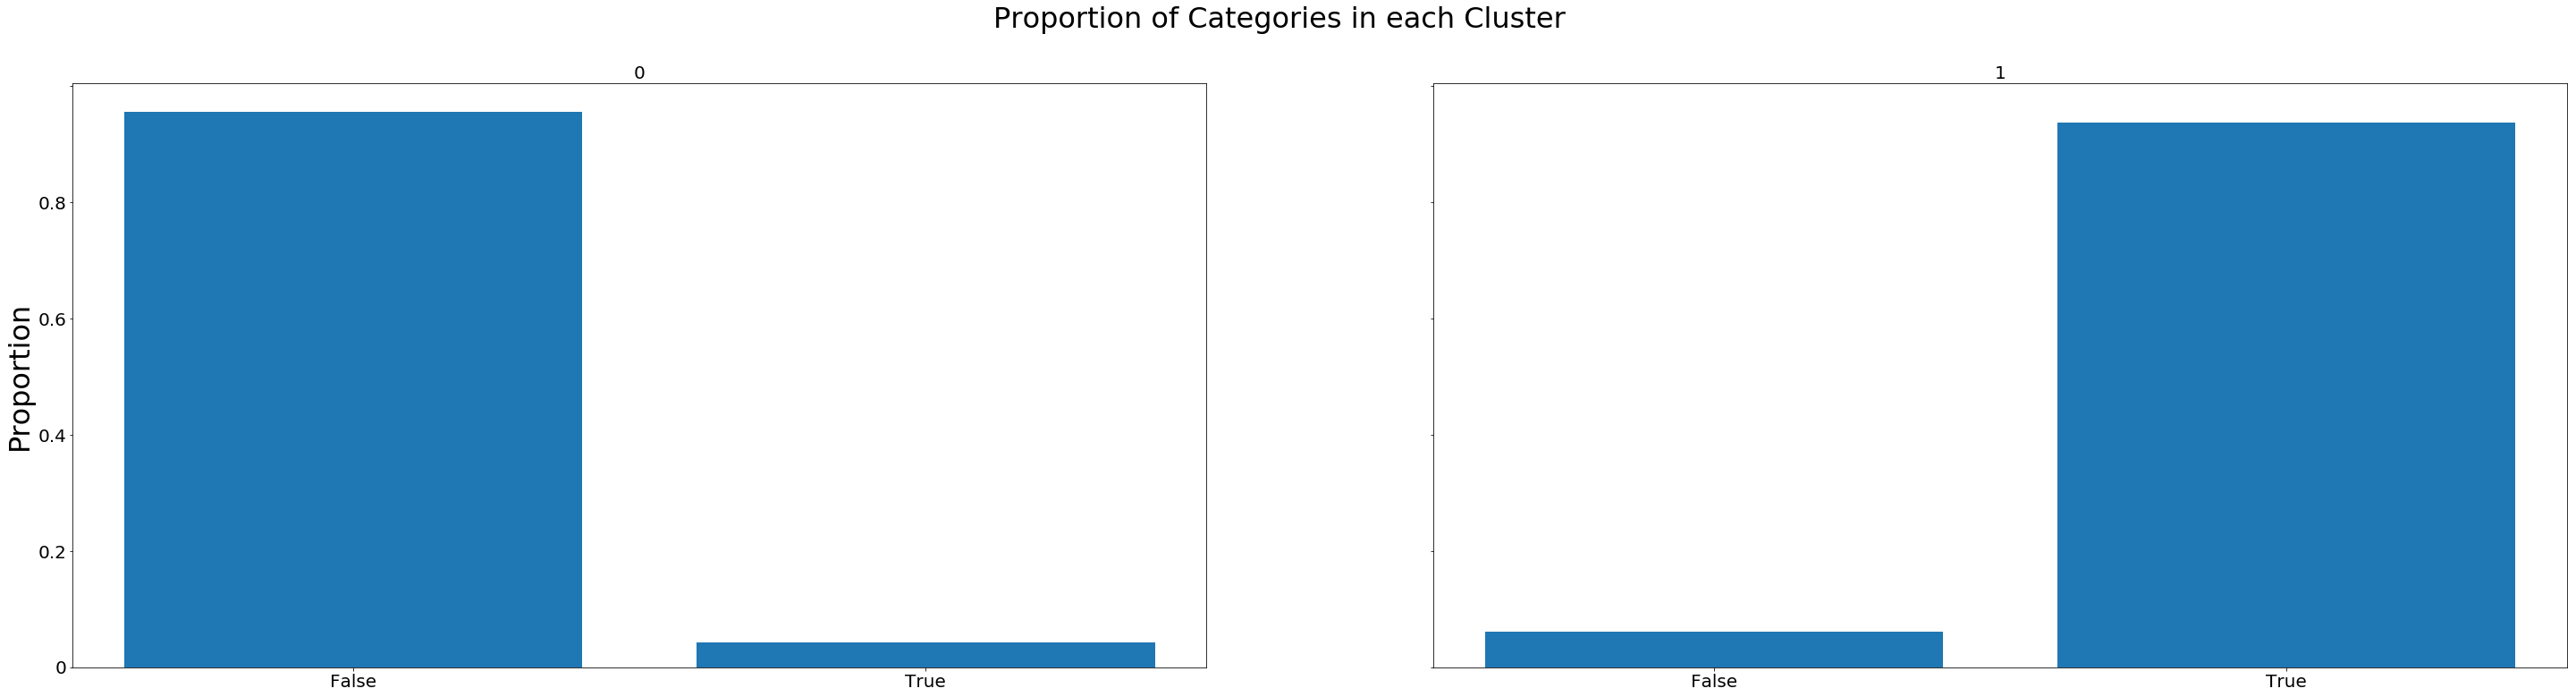

In [314]:
catPred(kmeans, y_test, preds)